In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

Loading Dataset

In [11]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test)= mnist.load_data()

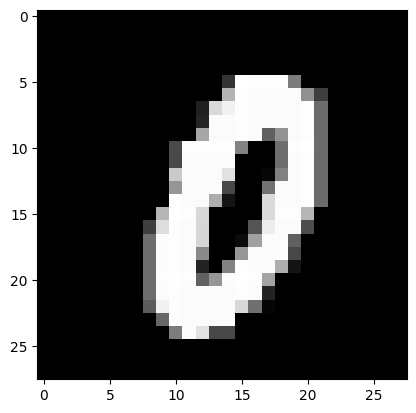

In [12]:
plt.imshow(x_train[34],cmap='gray')
plt.show()

In [13]:
x_train.shape

(60000, 28, 28)

preprocessing

In [14]:
x_train=x_train.reshape((-1,28,28,1)).astype('float32')/255
x_test=x_test.reshape((-1,28,28,1)).astype('float32')/255
x_train.shape

(60000, 28, 28, 1)

model definition

In [15]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='valid', input_shape=(28,28,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'] )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 128)       512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 26, 26, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)       

In [16]:
hist=model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
235/235 [==============================] - 9s 25ms/step - loss: 0.2192 - accuracy: 0.9418 - val_loss: 3.4653 - val_accuracy: 0.1135
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 1.6925 - val_accuracy: 0.3367
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.1158 - val_accuracy: 0.9679
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0810 - val_accuracy: 0.9763
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0556 - val_accuracy: 0.9857
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0614 - val_accuracy: 0.9827
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0652 - val_accuracy: 0.9822

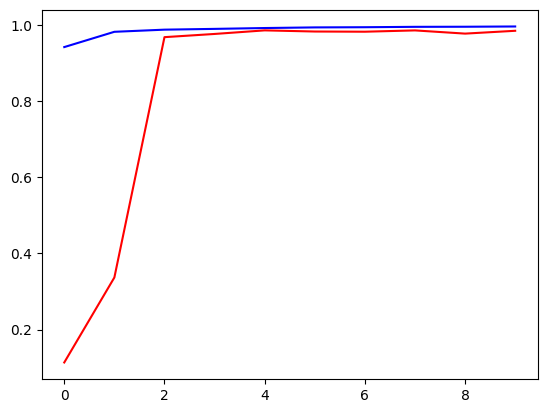

In [17]:
plt.plot(hist.history['accuracy'],color='blue')
plt.plot(hist.history['val_accuracy'],color='red')